In [249]:
import torch
from torch.distributions.dirichlet import Dirichlet
from torch.distributions import Normal
from torch.nn import functional as F
#
import matplotlib.pyplot as plt
import ternary

In [286]:
# https://openreview.net/pdf?id=rkgsvoA9K7

In [276]:
d_t = 3

In [281]:
torch.rand(d_t)

tensor([0.4773, 0.4874, 0.6165])

In [282]:
alphas = torch.Tensor((100, 100, 100))

In [283]:
mus = torch.log(alphas) - (1/d_t) * torch.log(alphas).sum()

In [284]:
sigmas = (1 / alphas) * (1 - 2 /d_t) + (1 / d_t**2) * torch.sum(1/alphas)
stds = torch.sqrt(sigmas)

In [261]:
dist_dirichlet = Dirichlet(alphas)
dist_normal = Normal(mus, stds)

In [262]:
n = 1000
x_normal = dist_normal.sample((n,))
x_normal = F.softmax(x_normal, dim=1)
x_dirichlet = dist_dirichlet.sample((n, ))

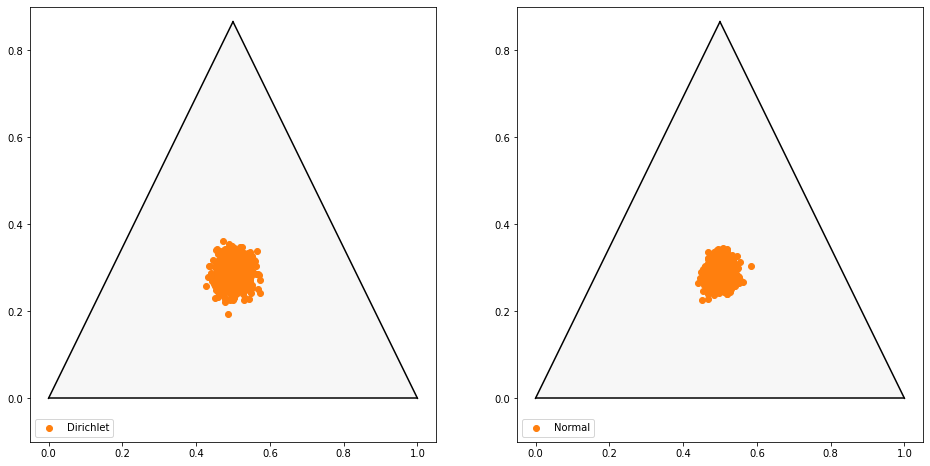

In [263]:
figure, axes = plt.subplots(1, 2, figsize=(16, 8))

tax0 = ternary.TernaryAxesSubplot(ax=axes[0])
tax1 = ternary.TernaryAxesSubplot(ax=axes[1])
#
tax0.scatter(x_dirichlet.numpy(), label="Dirichlet")
tax0.boundary()
tax1.scatter(x_normal.numpy(), label="Normal")
tax1.boundary()

tax0.legend()
tax1.legend()

In [191]:
n = 10000
x_normal = dist_normal.sample((n,))
x_normal = F.softmax(x_normal, dim=1)
x_dirichlet = dist_dirichlet.sample((n, ))

In [221]:
dist_dirichlet.log_prob(x_dirichlet).mean()

tensor(13.1264)

In [222]:
dist_dirichlet.log_prob(x_normal).mean()

tensor(1.2231)

In [247]:
all_n = torch.arange(10, 100, 1)
all_ll_d = []
all_ll_n = []
for n in all_n:
    n = int(n)
    alphas = torch.rand(d_t)
    #
    mus = torch.log(alphas) - (1/d_t) * (torch.sum(torch.log(alphas)))
    #
    sigmas = (1 / alphas) * (1 - 2 /d_t) + (1 / d_t**2) * torch.sum(1/alphas)
    stds = torch.sqrt(sigmas)
    #
    dist_dirichlet = Dirichlet(alphas)
    dist_normal = Normal(mus, stds)
    #
    x_normal = dist_normal.sample((n,))
    x_normal = F.softmax(x_normal, dim=1)
    x_dirichlet = dist_dirichlet.sample((n, ))
    #
    ll_d = dist_dirichlet.log_prob(x_dirichlet).mean()
    ll_n = dist_dirichlet.log_prob(x_normal).mean()
    #
    all_ll_d.append(ll_d)
    all_ll_n.append(ll_n)

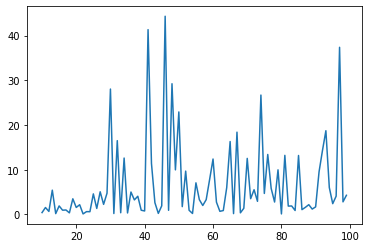

In [248]:
diff = [all_ll_d[i] - all_ll_n[i] for i in range(len(all_n))]
plt.plot(all_n, diff)

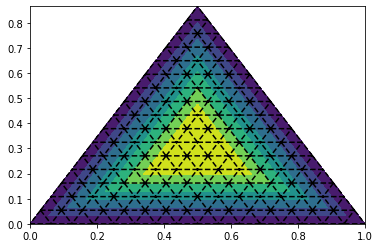

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri




# first load some data:  format x1,x2,x3,value
test_data = np.array([[0,0,1,0],
                      [0,1,0,0],
                      [1,0,0,0],
                      [0.25,0.25,0.5,1],
                      [0.25,0.5,0.25,1],
                      [0.5,0.25,0.25,1]])

# barycentric coords: (a,b,c)
a=test_data[:,0]
b=test_data[:,1]
c=test_data[:,2]

# values is stored in the last column
v = test_data[:,-1]

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5*np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
plt.tricontourf(x,y,T.triangles,v)


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')


plt.show()